<a href="https://colab.research.google.com/github/rafaeldeflon/Titanic_ML_kaggle_challenge/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Challenge 


## Importing the libraries and setting some initial settings

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
pd.options.display.max_columns = None
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Getting to know the dataset

In [99]:
print("Columns:\t{}\nRows:\t{}".format(train.shape[1], train.shape[0]))

Columns:	12
Rows:	891


In [100]:
display(train.dtypes)
display(train.head(10))

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [101]:
# How much data is missing per column? (%)

(train.isnull().sum() / train.shape[0]).sort_values(ascending=False)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
dtype: float64

## Getting to know the dataset statistically

In [102]:
# Getting the statistical parameters

train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2832c63b90>,
      dtype=object)

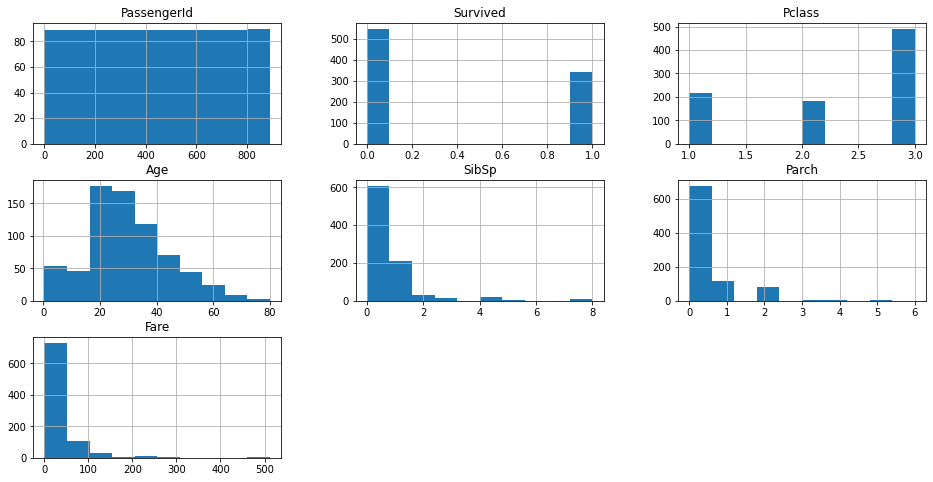

In [103]:
train.hist(figsize=(16,8))

#Analysing the data

Which groups had the highest survival rate?

In [104]:
# Analysing the survival rate (%) by gender:
train[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [105]:
# Analysing the survival rate (%) by passangers class:

train[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [106]:
# Analysing the survival rate(%) by passangers class:
#   C = Cherbourg
#   Q = Queenstown
#   S = Southampton

train[['Embarked', 'Survived']].groupby(['Embarked']).mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


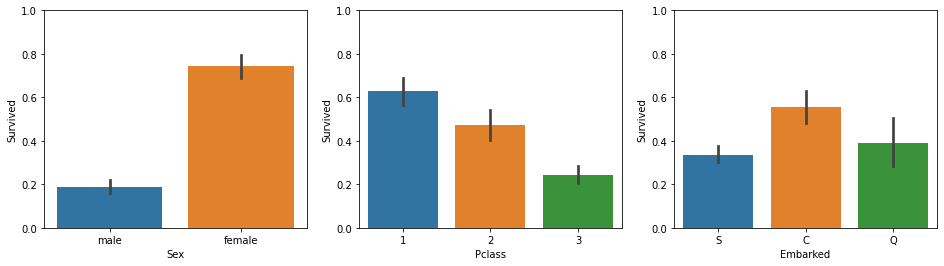

In [107]:
# Plotting the survival rate (%) by groups

fig, (sexsr, pcsr, esr) = plt.subplots(1,3, figsize=(16,4))

sx = sns.barplot(x='Sex', y='Survived', data=train, ax=sexsr)
sx.set(ylim=(0, 1))
sx

px = sns.barplot(x='Pclass', y='Survived', data=train, ax=pcsr)
px.set(ylim=(0, 1))
px

ex = sns.barplot(x='Embarked', y='Survived', data=train, ax=esr);
ex.set(ylim=(0, 1))
ex

Analysing the data by the passengers age

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


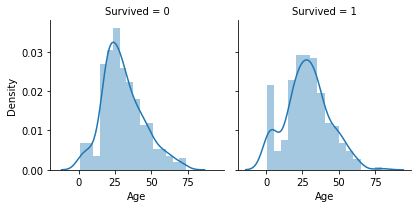

In [108]:
age_survived = sns.FacetGrid(train, col='Survived')
age_survived.map(sns.distplot, 'Age')


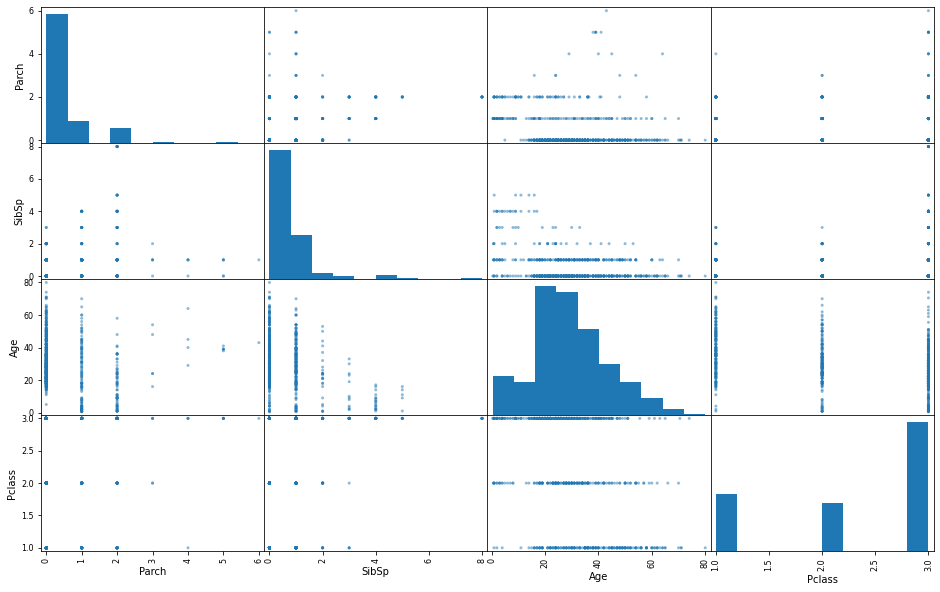

In [109]:
columns=['Parch', 'SibSp', 'Age', 'Pclass']
pd.plotting.scatter_matrix(train[columns], figsize=(16, 10));

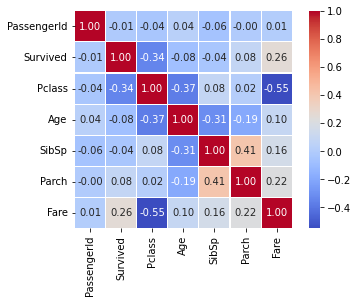

In [110]:
sns.heatmap(train.corr(), cmap='coolwarm', fmt='.2f', linewidths=0.1,
            vmax=1.0, square=True, linecolor='white', annot=True);

In [111]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


# Working on the DataFrame

In [112]:
# Saving the indexes for futher analysies
train_idx = train.shape[0]
test_idx = test.shape[0]

# Saving the 'PassengerId' for the Kaggle submission
passengerId = test['PassengerId']

# Extracting the column 'Survived' and deleting it from the 'test' dadaset
target = train.Survived.copy()
train.drop(['Survived'], axis=1, inplace=True)

# Concatanating 'test' and 'train' on a unique DataFrame
df_merged = pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

print("df_merged.shape: ({} x {})".format(df_merged.shape[0], df_merged.shape[1]))

df_merged.shape: (1309 x 11)


In [113]:
# Droping useless columns

df_merged.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [114]:
df_merged.isnull().sum()

Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

In [115]:
# Filling the missing data

# age with the median
age_median = df_merged['Age'].median()
df_merged['Age'].fillna(age_median, inplace=True)

# fare with the median
fare_median = df_merged['Fare'].median()
df_merged['Fare'].fillna(fare_median, inplace=True)

# embarked with the most common value counted
embarked_top = df_merged['Embarked'].value_counts()[0]
df_merged['Embarked'].fillna(embarked_top, inplace=True)

In [116]:
# Replacing 'Sex' with 0 (male) and 1 (female)
df_merged['Sex'] = df_merged['Sex'].map({'male': 0, 'female': 1})

# Dummie variables for 'Embaked'
embarked_dummies = pd.get_dummies(df_merged['Embarked'], prefix='Embarked')
df_merged = pd.concat([df_merged, embarked_dummies], axis=1)
df_merged.drop('Embarked', axis=1, inplace=True)

display(df_merged.head())

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_914,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,3,0,35.0,0,0,8.0500,0,0,0,1


In [117]:
# Rebuilding the datasets 'test' and 'train'

train = df_merged.iloc[:train_idx]
test = df_merged.iloc[train_idx:]

# Modeling with Machine Learning

## Logistic Regression

In [118]:
# Importing the machine learning libraries for the modeling process

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [119]:
# Building a model with Logistic Regression

lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(train, target)

# Checking the model accuracy

acc_logReg = round(lr_model.score(train, target) * 100, 2)
print("Acurácia do modelo de Regressão Logística: {}".format(acc_logReg))

Acurácia do modelo de Regressão Logística: 80.13


In [120]:
y_pred_lr = lr_model.predict(test)

submission = pd.DataFrame({
    "PassengerId": passengerId,
    "Survived": y_pred_lr
})

# Saving the csv for kaggle

submission.to_csv('./submission_lr.csv', index=False)

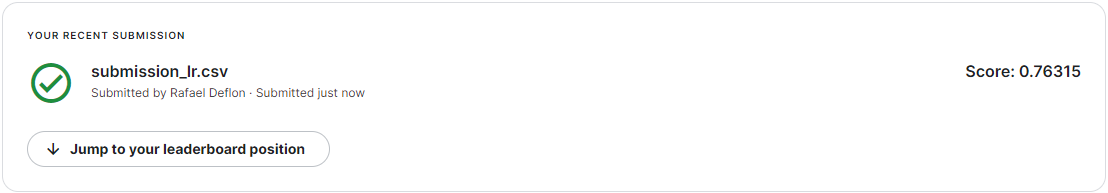

## Decision tree

In [121]:
# Building a model with Decision Tree Classifier

tree_model = DecisionTreeClassifier(max_depth=3)
tree_model.fit(train, target)

# Checking the model accuracy

acc_tree = round(tree_model.score(train, target) * 100, 2)
print("Acurácia do modelo de Árvore de Decisão: {}".format(acc_tree))

Acurácia do modelo de Árvore de Decisão: 82.72


In [122]:
y_pred_tree = tree_model.predict(test)

submission = pd.DataFrame({
    "PassengerId": passengerId,
    "Survived": y_pred_tree
})

# Saving the csv for kaggle

submission.to_csv('./submission_tree.csv', index=False)

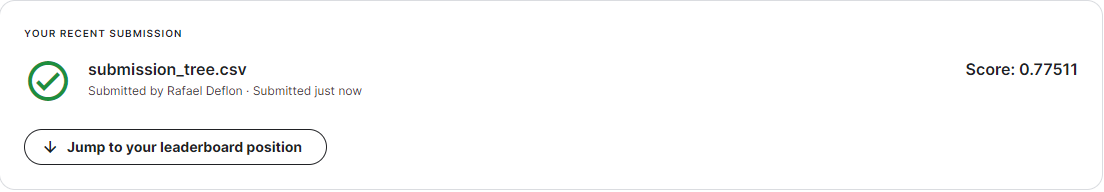

# My family would survive the Titanic?

In [124]:
# Declare variable values for me and my parents

me = np.array([2, 0, 24, 1, 1, 32.2, 0, 0, 0, 1]).reshape((1, -1))
mom = np.array([2, 1, 53, 1, 1, 32.2, 0, 0, 0, 1]).reshape((1, -1))
dad = np.array([2, 0, 52, 1, 1, 32.2, 0, 0, 0, 1]).reshape((1, -1))

# Check if we would have survived

print("me:\t{}".format(tree_model.predict(me)[0]))
print("mom:\t{}".format(tree_model.predict(mom)[0]))
print("dad:\t{}".format(tree_model.predict(dad)[0]))

me:	0
mom:	1
dad:	0


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


Only my mom would have survived titanic due my model 😢